<a href="https://colab.research.google.com/github/Iamfouzia/AI_Machine_Learning_projects/blob/main/CIFAR_10_Transfer_Learning_with_MobileNetV2__cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Train shape: (50000, 32, 32, 3) (50000, 1)
Test shape: (10000, 32, 32, 3) (10000, 1)


/tmp/ipython-input-2859639056.py:45: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 2, 2, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,588,490 (9.87 MB)

 Trainable params: 330,506 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 - 97s - 62ms/step - accuracy: 0.5493 - loss: 1.2812 - val_accuracy: 0.6532 - val_loss: 1.0117
Epoch 2/10
1563/1563 - 62s - 40ms/step - accuracy: 0.6015 - loss: 1.1335 - val_accuracy: 0.6532 - val_loss: 0.9911
Epoch 3/10
1563/1563 - 62s - 40ms/step - accuracy: 0.6130 - loss: 1.0996 - val_accuracy: 0.6615 - val_loss: 0.9629
Epoch 4/10
1563/1563 - 62s - 39ms/step - accuracy: 0.6212 - loss: 1.0764 - val_accuracy: 0.6695 - val_loss: 0.9521
Epoch 5/10
1563/1563 - 61s - 39ms/step - accuracy: 0.6304 - loss: 1.0484 - val_accuracy: 0.6662 - val_loss: 0.9563
Epoch 6/10
1563/1563 - 62s - 39ms/step - accuracy: 0.6334 - loss: 1.0427 - val_accuracy: 0.6720 - val_loss: 0.9364
Epoch 7/10
1563/1563 - 61s - 39ms/step - accuracy: 0.6408 - loss: 1.0257 - val_accuracy: 0.6771 - val_loss: 0.9257
Epoch 8/10
1563/1563 - 61s - 39ms/step - accuracy: 0.6416 - loss: 1.0179 - val_accuracy: 0.6742 - val_loss: 0.9320
Epoch 9/10
1563/1563 - 62s - 40ms/step - accuracy: 0.6445 - loss: 1.0077 - val_accuracy: 0.

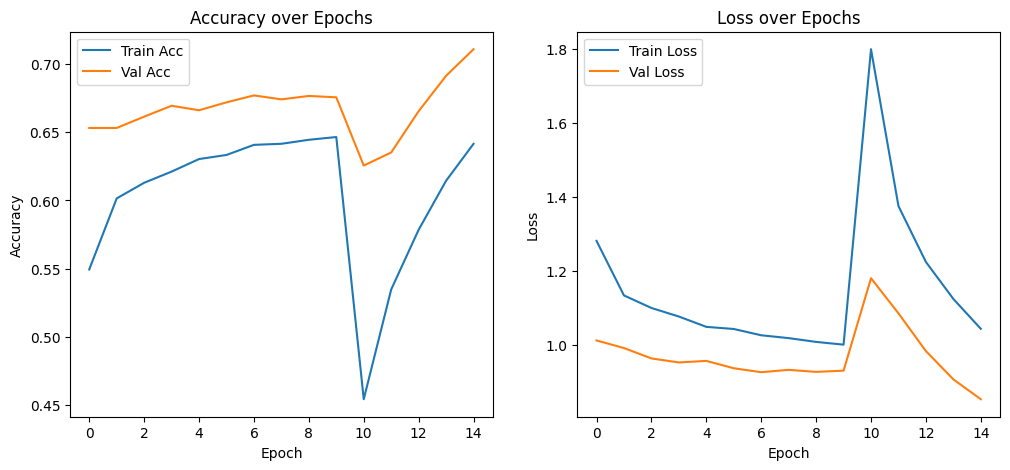

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


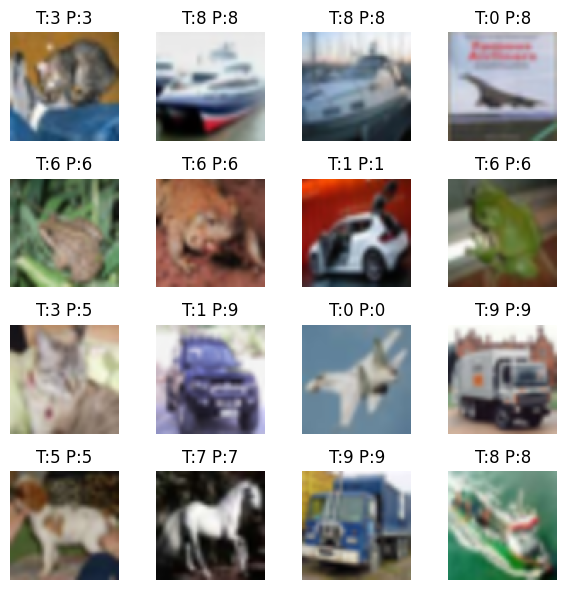

In [ ]:
# CIFAR-10 Image Classification using Transfer Learning (MobileNetV2)
#


import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import gc

#Load CIFAR-10 dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print("Train shape:", x_train.shape, y_train.shape)
print("Test shape:", x_test.shape, y_test.shape)

#  Normalize and Resize Images

# Resize from 32x32 → 64x64 (smaller = less RAM)
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

x_train = tf.image.resize(x_train, (64, 64))
x_test  = tf.image.resize(x_test, (64, 64))

# One-hot encode labels
y_train = to_categorical(y_train.flatten(), 10)
y_test  = to_categorical(y_test.flatten(), 10)

# Data Augmentation

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

#  Load Pretrained MobileNetV2 (Transfer Learning)

base_model = tf.keras.applications.MobileNetV2(
    input_shape=(64, 64, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base initially

# Build the Full Model

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Train Top Layers
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(x_test, y_test),
    verbose=2
)

#Fine-tune: Unfreeze Last Layers

base_model.trainable = True
fine_tune_at = 100  # Unfreeze last 100 layers

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Recompile with smaller LR
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Clear memory before fine-tuning
gc.collect()
tf.keras.backend.clear_session()

# Fine-tune the Model
history_fine = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=5,
    validation_data=(x_test, y_test),
    verbose=2
)

# Evaluate Model

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n Final Test Accuracy: {test_acc * 100:.2f}%")

#  Plot Training Progress

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'] + history_fine.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'] + history_fine.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'] + history_fine.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Sample Predictions

preds = model.predict(x_test[:16])
pred_labels = np.argmax(preds, axis=1)
true_labels = np.argmax(y_test[:16], axis=1)

plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"T:{true_labels[i]} P:{pred_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
